In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns


from sklearn.model_selection import train_test_split

In [29]:
import pandas as pd

df=pd.read_csv("breast-cancer.data",header=None)
df = df[~df.apply(lambda row: '?' in row.values, axis=1)]
df[0]=df[0].apply(lambda x: 1 if (x=="recurrence-events") else 0)
df[1]=df[1].apply(lambda x: int(x[0]))
df[3]=df[3].apply(lambda x: int(x.split("-")[0]))
df[4]=df[4].apply(lambda x: int(x.split("-")[0]))
df[5]=df[5].apply(lambda x: 0 if x=="no" else 1)
df[6]=df[6].apply(lambda x: int(x))
df[7]=df[6].apply(lambda x: 0 if x=="left" else 1)
df[9]=df[9].apply(lambda x: 0 if x=="no" else 1)
df=pd.get_dummies(df,columns=[2,8])
df.replace({True: 1, False: 0}, inplace=True)
df = df.astype(int)
df.columns = df.columns.astype(str)

X, X_test, y, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,[0]], test_size=0.3, random_state=550)


In [3]:
import warnings
warnings.filterwarnings("ignore")

Predicting with parameter depth=2
Predicting with parameter depth=4
Predicting with parameter depth=6
Predicting with parameter depth=8
Predicting with parameter depth=10


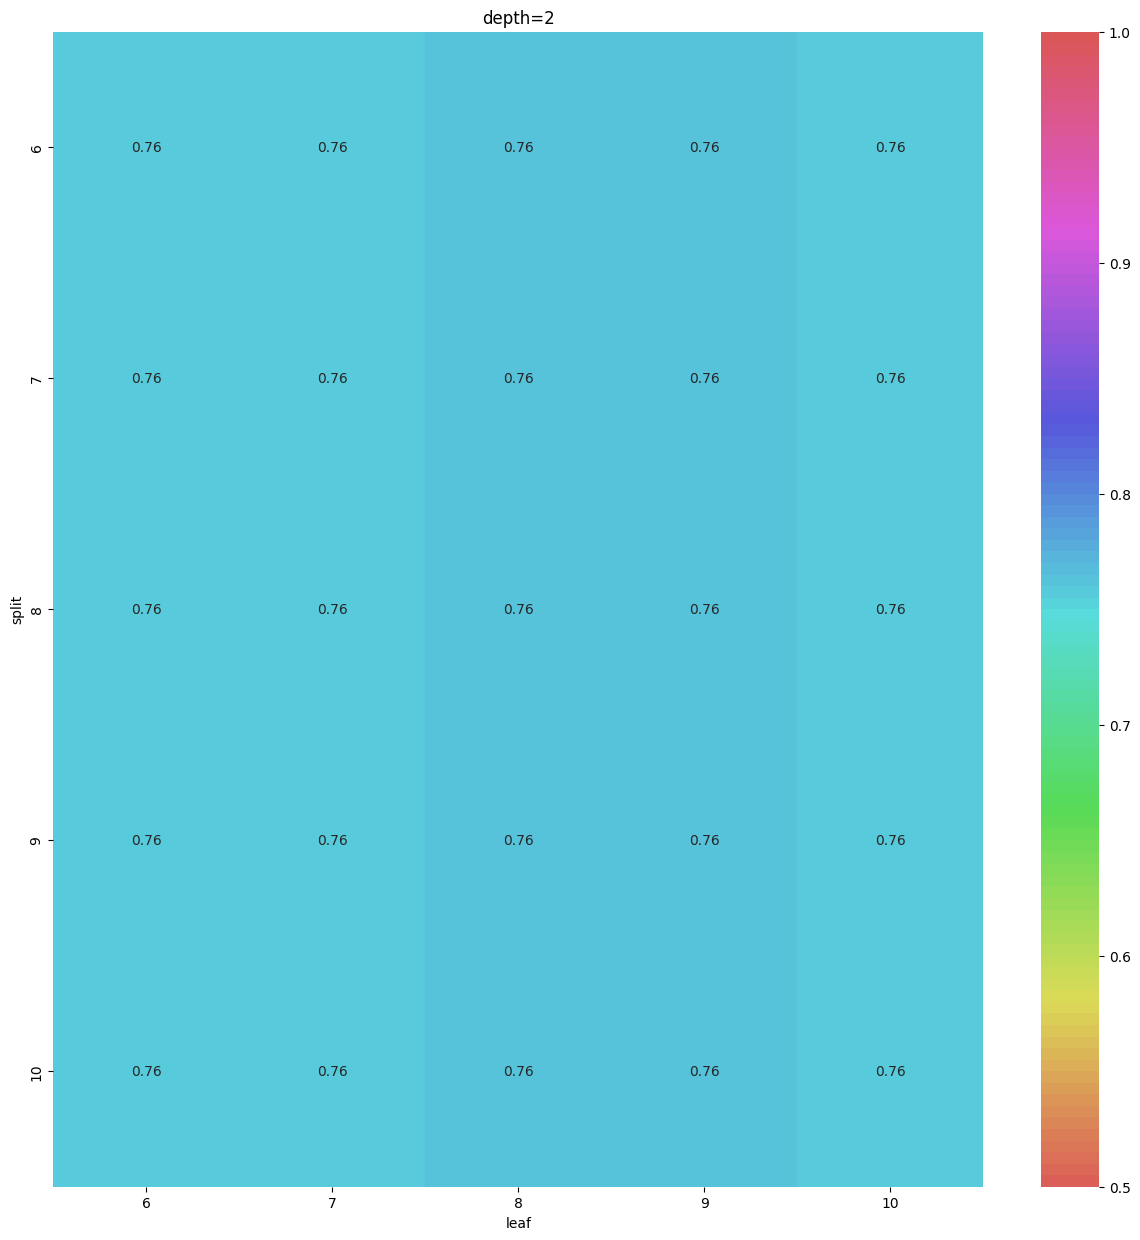

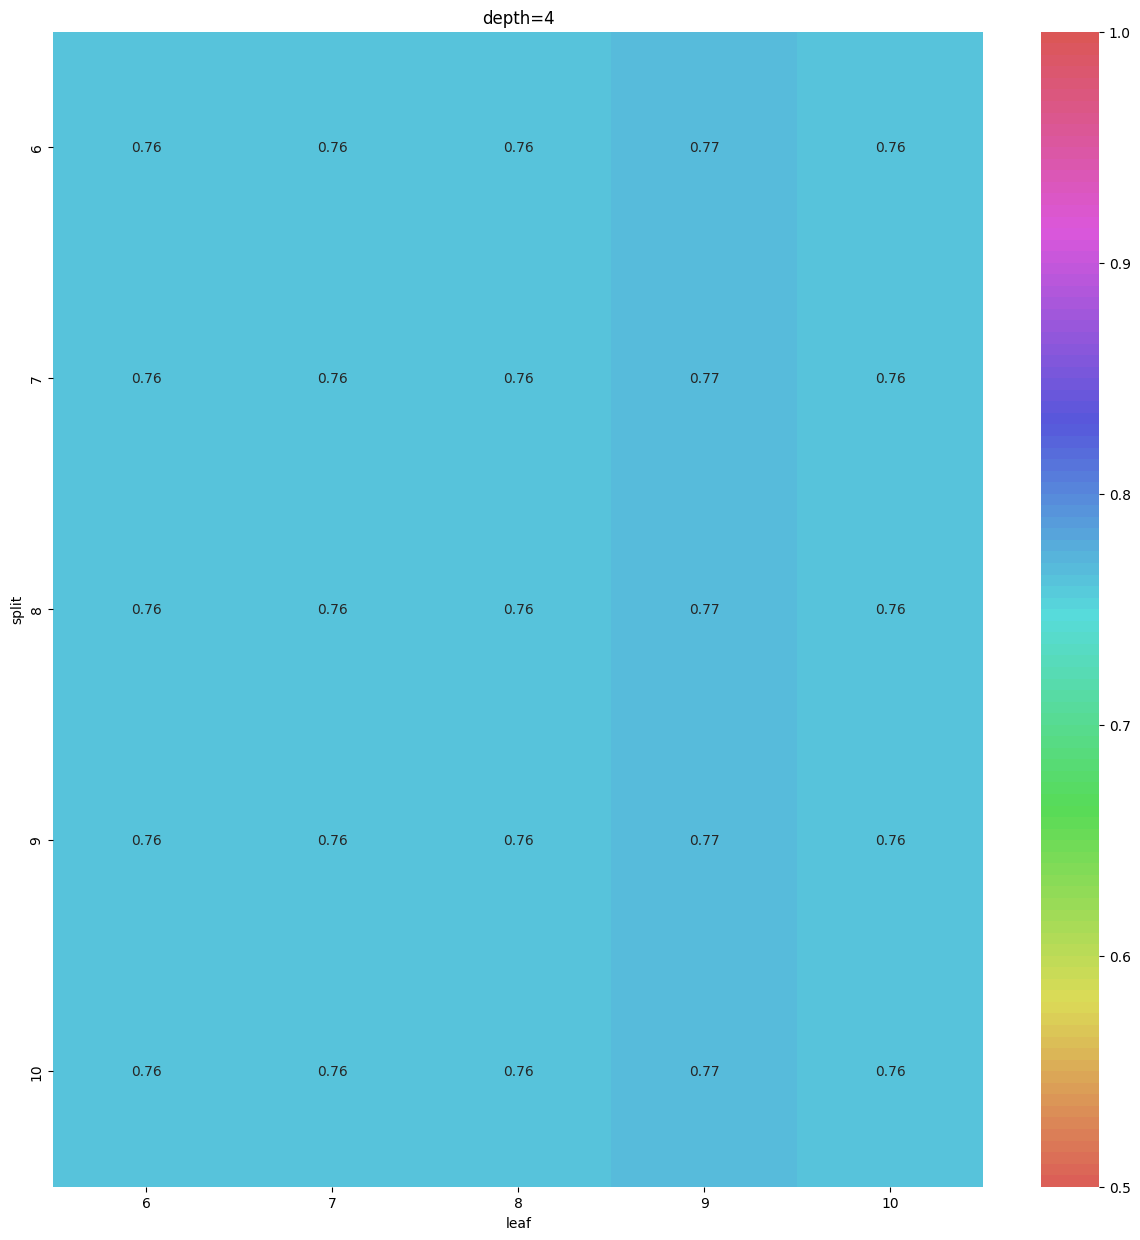

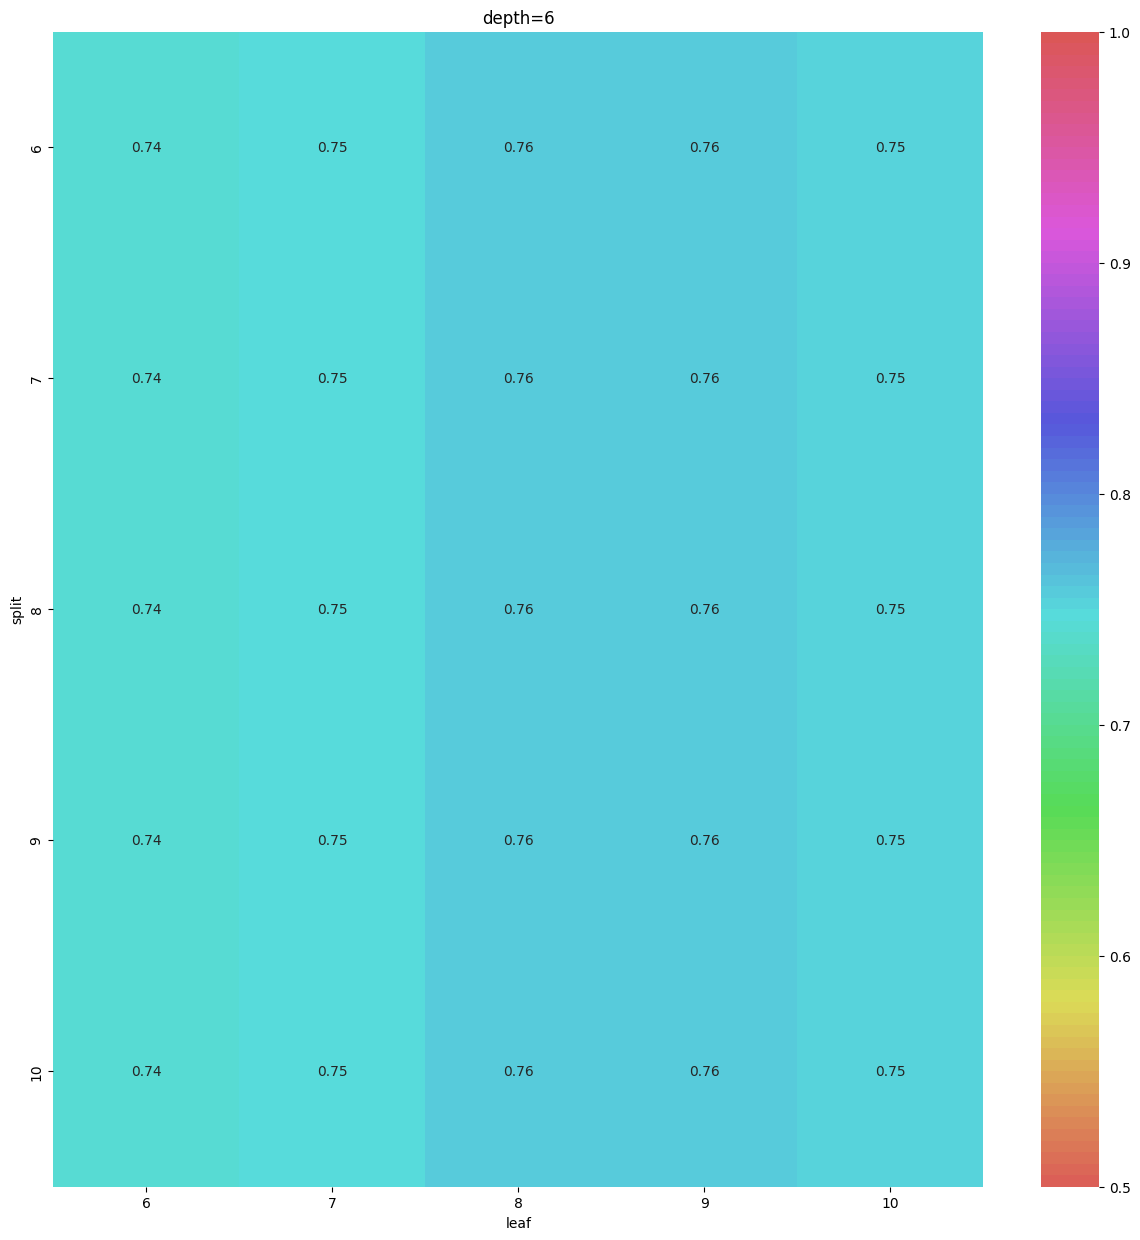

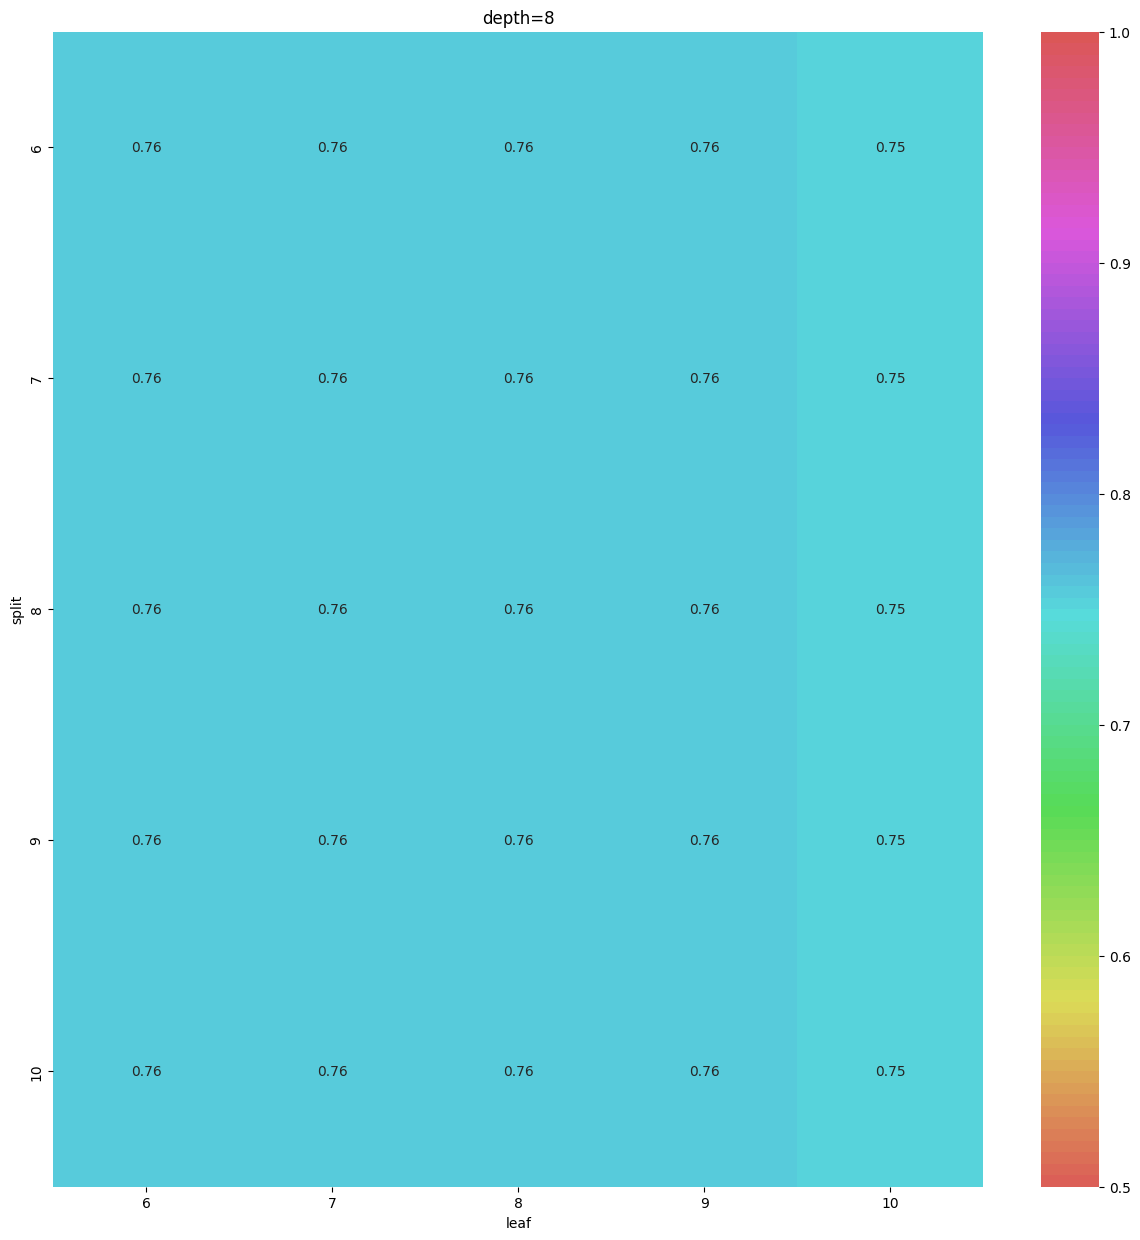

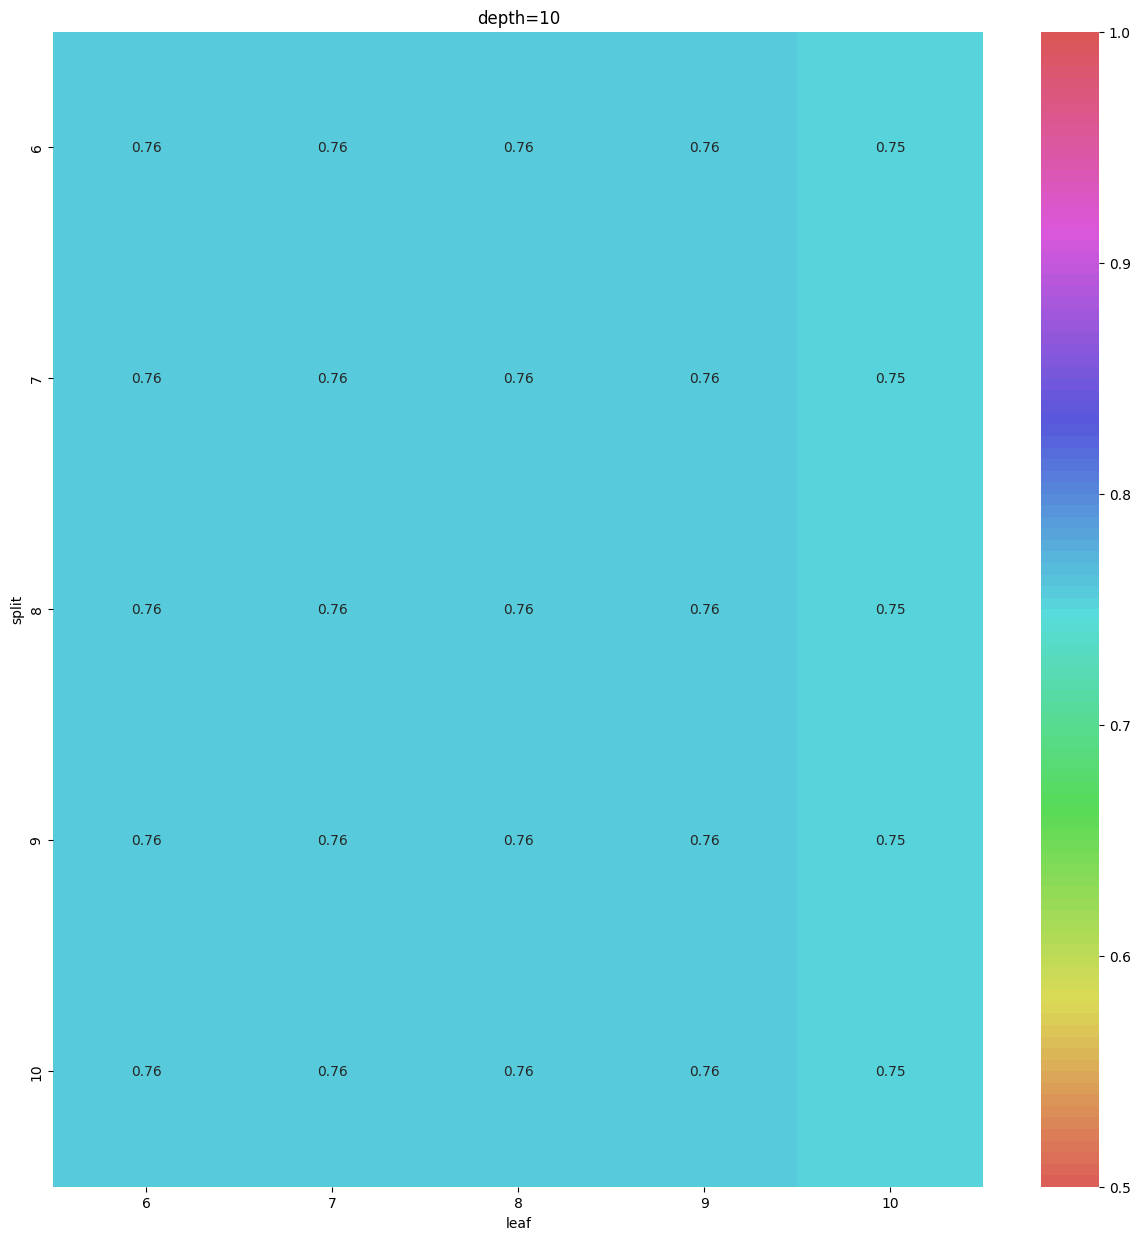

In [31]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
labelX=[]
labelY=[]
i=6
while i<=10:
    labelX.append(i)
    labelY.append(i)
    i=i+1
depth=0
while depth<10:
    depth=depth+2
    big_arr=[]
    split=5
    print(f"Predicting with parameter depth={depth}")
    while split<10:
        split=split+1
        arr=[]
        leaf=5
        while leaf<10:
            leaf=leaf+1
            clf = RandomForestClassifier(max_depth=depth, random_state=0, min_samples_split=split, min_samples_leaf=leaf,n_jobs=-1)
            kf = KFold(n_splits=10, shuffle=True, random_state=550)
            
            accuracies = []
            all_true_labels = []
            all_predicted_labels = []

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]
                
                # Train the classifier and predict on the test set
                y_pred = clf.fit(X_train, y_train).predict(X_test)
                
                # Calculate accuracy for this fold
                accuracy = accuracy_score(y_test, y_pred)
                accuracies.append(accuracy)
            mean_accuracy = np.mean(accuracies)

            arr.append(mean_accuracy) 
        big_arr.append(arr) 
    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(data=big_arr,vmax=1,vmin=0.50,annot=True,xticklabels=labelX,yticklabels=labelY,ax=ax,cmap=sns.color_palette("hls", 100))
    ax.set_xlabel("leaf")
    ax.set_ylabel("split")
    ax.set_title("depth="+str(depth))
    fig.savefig(str(depth))    
      
            


In [32]:
clf = RandomForestClassifier(max_depth=4, random_state=550, min_samples_split=8, min_samples_leaf=9,n_jobs=-1)
clf.fit(X,y)
clf.score(X_test,y_test)

0.9473684210526315

In [33]:
i=0
scores=[]
while i<1000:
    X, X_test, y, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,[0]], test_size=0.2, random_state=i)
    clf = RandomForestClassifier(max_depth=4, random_state=i, min_samples_split=8, min_samples_leaf=9,n_jobs=-1)
    clf.fit(X,y)
    scores.append(clf.score(X_test,y_test))
    i=i+1


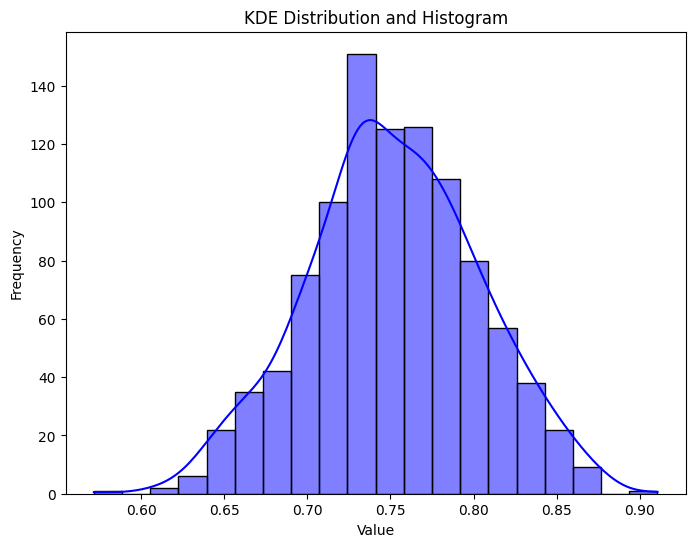

In [34]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot KDE distribution and histogram on the same plot
sns.histplot(scores, kde=True, color='blue', ax=ax, bins=20)

ax.set_title("KDE Distribution and Histogram")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")

plt.show()